# CAP 4630 - Intro to AI
## Assignment 5

## Jonathan Masino(Reporter), Ava Perrone(Developer), and Steven Fernandez(Architect)
#jmasino2019   perronea2020    stevenfernan2020
Deep learning solutions for: 
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb 
- https://developers.google.com/machine-learning/guides/text-classification/
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

#### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture. 

### Load and prepare the data

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### (OPTIONAL) TODO 2

Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

### Building your model

#### Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 33ms/step - loss: 0.5028 - accuracy: 0.7903 - val_loss: 0.3779 - val_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3026 - accuracy: 0.9052 - val_loss: 0.3069 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2215 - accuracy: 0.9310 - val_loss: 0.2851 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1793 - accuracy: 0.9413 - val_loss: 0.2907 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1450 - accuracy: 0.9531 - val_loss: 0.2896 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1192 - accuracy: 0.9643 - val_loss: 0.2923 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1000 - accuracy: 0.9701 - val_loss: 0.3067 - val_accuracy: 0.8852
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

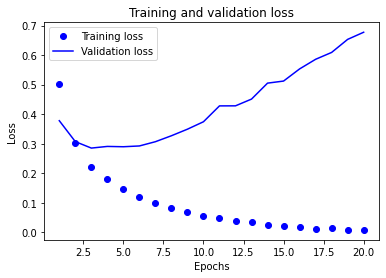

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

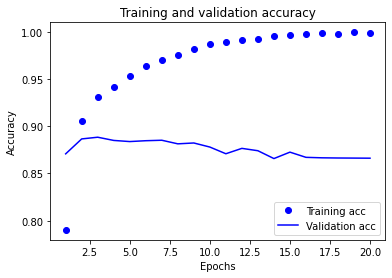

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 3

Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

Comment on the mistakes and what you believe might have caused each of them. 

### (OPTIONAL) TODO 4

Write code to try different combinations of:
- numbers of hidden layers and units per layer 
- loss functions
- activation functions

Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

### Retraining a model from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4425 - accuracy: 0.8210
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2530 - accuracy: 0.9126
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1943 - accuracy: 0.9315
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3048 - accuracy: 0.8786


### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

array([[0.13341339],
       [0.9993438 ],
       [0.46035817],
       ...,
       [0.0771343 ],
       [0.04864751],
       [0.5585398 ]], dtype=float32)

## PART 2 - Multiclass classification of newswires using the Reuters dataset

Once again, we will start with a simple solution using a fully-connected neural network architecture. 

### The Reuters dataset

#### Loading the Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.5934 - accuracy: 0.5522 - val_loss: 1.7035 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4044 - accuracy: 0.7098 - val_loss: 1.2768 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0315 - accuracy: 0.7800 - val_loss: 1.1345 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8087 - accuracy: 0.8292 - val_loss: 1.0107 - val_accuracy: 0.7980
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6448 - accuracy: 0.8706 - val_loss: 0.9379 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5161 - accuracy: 0.8951 - val_loss: 0.9275 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4163 - accuracy: 0.9147 - val_loss: 0.8774 - val_accuracy: 0.8190
Epoch 8/20
16

#### Plotting the training and validation loss

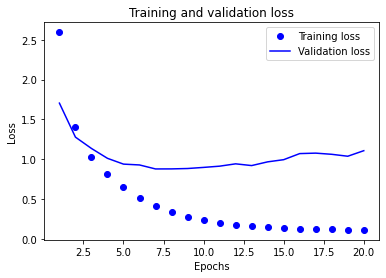

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

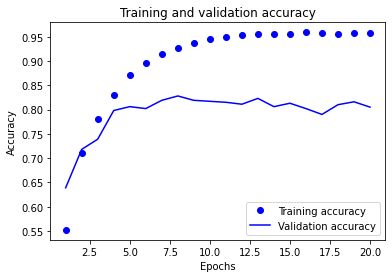

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 5

Write code to try different combinations of:
- numbers of hidden layers and units per layer 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

### Retraining a model from scratch

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.4197 - accuracy: 0.5311
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.3196 - accuracy: 0.7161
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9813 - accuracy: 0.7923
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7647 - accuracy: 0.8417
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6013 - accuracy: 0.8752
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4744 - accuracy: 0.8999
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3814 - accuracy: 0.9172
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3102 - accuracy: 0.9310
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9996 - accuracy: 0.7809


In [ ]:
results

[0.9996041059494019, 0.7809438705444336]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18477292965271594

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

4

## PART 3 - Regression for house price estimation using the Boston Housing Price dataset

### The Boston Housing Price dataset

#### Loading the Boston housing dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[1.8966176509857178, 2.6238913536071777, 2.684126853942871, 2.3987762928009033]

In [ ]:
np.mean(all_scores)

2.4008530378341675

#### Saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

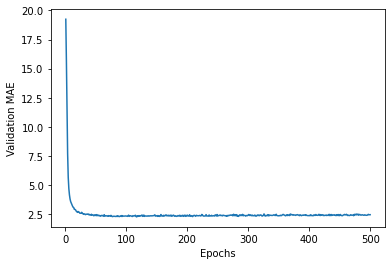

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

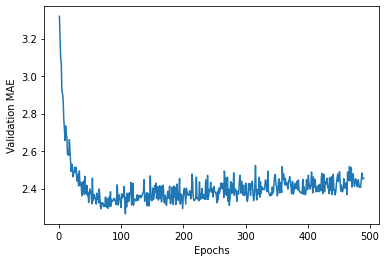

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.8649 - mae: 2.3979


In [ ]:
test_mae_score

2.397857904434204

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

array([8.703859], dtype=float32)

### (OPTIONAL) TODO 6

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

### CONCLUSIONS

### LESSONS LEARNED

- This assignment did take us quite some time.
- Finding answers for the questions was challenge
- Deciding what method(s) used was complicated.
- We split the work up pretty evenly and got this assingment done before the due date.

## Documentation of the solution

PART 1: 
(1) What type of preprocessing was applied to the raw input data? Why was it necessary to do so? 
Ans: The integer sequence was encoded via multi-hot encoding. This was necessary because it sets up the data for the training set.

(2) Does your model suffer from overfitting? If so, what would you suggest doing about it? 
Ans: Yes, the model suffered from overfitting because validation loss is increasing while training loss is decreasing. As a team we concluded that the best suggestion to correct the overfitting in this case is to correct some of the code.

(3) Is accuracy a good metric of success in this case? Why (not)?
Ans: Yes, as you can see from the graph, the validation accuracy line was quite accurate. This is good because it shows that the data was validated correctly.

PART 2: 
(1) What type of preprocessing was applied to the raw input data? Why was it necessary to do so? 
Ans: The data and the labels were encoded using the vectorize sequence. This was necessary to prepare the data for the training set.

(2) How many categories are there in this case? 
Ans: There are 2 categories in this case loss and accuracy.

(3) Does your model suffer from overfitting? If so, what would you suggest doing about it? 
Ans: Yes, the model suffered from overfitting because validation loss is decreasing at the beginning but after some time it pretty much stays stable while training loss is still decreasing. As a team we concluded that the best suggestion to correct the overfitting in this case is to correct some of the code.

(4) Is accuracy a good metric of success in this case? Why (not)?
Ans: Yes, as you can see from the graph, the validation accuracy line was quite accurate. This is good because it shows that the data was validated correctly.

PART 3: 
(1) What type of preprocessing was applied to the raw input data? Why was it necessary to do so? 
Ans: The data was normalized. This was necessary for the test set. 

(2) Why is this problem a case of regression (rather than classification)? 
Ans: Because the main objective of regression is to predict a continuous value instead of a discrete label like in the case of classification.

(3) Does your model suffer from overfitting? If so, what would you suggest doing about it? 
Ans: No, looking at the graphs we can see that overfitting is almost nonexistent. 

(4) Is mean absolute error (MAE) a good metric of success in this case? Why (not)?
Ans: Yes, because MAE is the absolute value of the difference between the predictions and the targets. The approximate MAE score in this case of 2.6 would mean this prediction is off by $2.600 on average.


##References

François, C. (2017). Deep Learning with Python. Manning. 